# EE 460J Lab 2 Report
### Lab Group Members: Tatsushi Matsumoto, Nick Taylor, Matthew Withey

## Problem 1

In [1]:
#imports
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import pandas as pd
import seaborn as sns
from IPython.display import display

In [2]:
df1 = pd.read_csv('Lab2_Data/DF1', index_col=0)
#df1.drop('Unnamed: 0', axis = 1, inplace = True)
samples, featues = df1.shape
display(df1)

,0,1,2,3
0,1.038502,0.899865,0.835053,-0.971528
1,0.320455,-0.647459,0.149079,0.352593
2,0.055480,2.234771,0.271672,-2.108739
3,-0.007260,-0.524299,-0.126550,0.670827
4,-1.237390,-1.377017,-1.049932,1.342079
...,...,...,...,...
9995,-0.632309,-0.145873,-0.797517,0.436184
9996,0.679417,-0.530216,0.526470,0.439397
9997,0.890697,-2.210855,1.072751,2.285372
9998,0.475293,0.490971,0.536909,-0.195772


In [3]:
df1_corr = df1.corr()
display(df1_corr)

,0,1,2,3
0,1.000000,-0.003998,0.990066,0.004111
1,-0.003998,1.000000,-0.004085,-0.990235
2,0.990066,-0.004085,1.000000,0.004067
3,0.004111,-0.990235,0.004067,1.000000


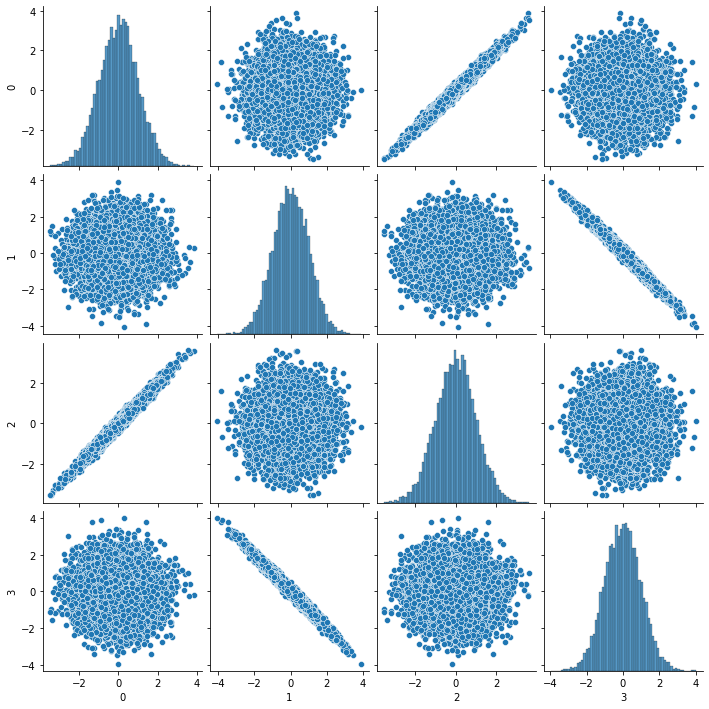

In [4]:
sns_corr1 = sns.pairplot(df1)
display(sns_corr1)

In [5]:
df1_centered = df1 - df1.mean()
df1_cov_explicit = (df1_centered.T.dot(df1_centered))/(samples-1)
display(df1_cov_explicit)

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


In [6]:
df1_cov = df1.cov()
display(df1_cov)

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


Idk what to put here

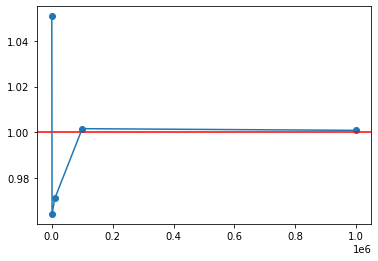

In [7]:
C = ([1, 0, 0], 
     [0, 1, 1], 
     [0, 1, 1])
mean = [0, 0, 0]
cov = [0, 0, 0, 0, 0]
y = [100, 1000, 10000, 100000, 1000000]
for i in range(5):
     Z = np.random.multivariate_normal(mean, C, 100*(10**i))
     temp = np.cov(Z[0::, 1], Z[0::, 2])
     cov[i] = temp[0, 0]
plt.axhline(y=1, color='r', linestyle='-')
plt.scatter(y, cov)
plt.plot(y, cov)
plt.show()

## Problem 2

In [8]:
df2 = pd.read_csv('Lab2_Data/DF2', index_col=0)
#df2.drop('Unnamed: 0', axis = 1, inplace = True)
samples, featues = df2.shape
display(df2)

,0,1
0,1.038502,0.835053
1,0.320455,0.149079
2,0.055480,0.271672
3,-0.007260,-0.126550
4,-1.237390,-1.049932
...,...,...
9995,-0.632309,-0.797517
9996,0.679417,0.526470
9997,0.890697,1.072751
9998,0.475293,0.536909


<AxesSubplot:title={'center':'DF2 Scatterplot'}, xlabel='col0', ylabel='col1'>

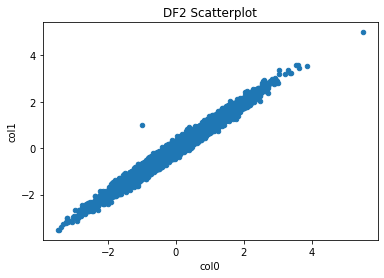

In [9]:
df2_sp = df2.plot.scatter(0, 1)
df2_sp.set_xlabel('col0')
df2_sp.set_ylabel('col1')
df2_sp.set_title('DF2 Scatterplot')
display(df2_sp)

New transformed position of [-1,1]: [-0.    14.029]
New transformed position of [5.5,5]: [ 5.252 -3.498]
Based on the new plot, [-1,1] is clearly more outlying than [5.5, 5]


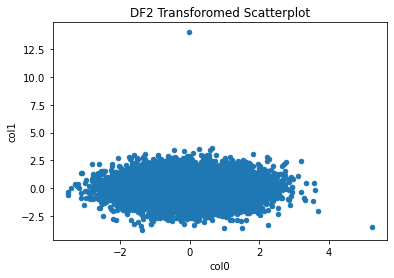

In [10]:
df2_centered = df2 - df2.mean()
df2_cov = df2_centered.cov()

first_point = np.array([-1,1])
second_point = np.array([5.5,5])

w, v = np.linalg.eig(df2_cov)
diag_w = np.diag(1/(w**0.5))
whitened = (diag_w @ np.transpose(v)) @ df2_centered.T
whitened_plot = whitened.T.plot.scatter(0,1)
whitened_plot.set_xlabel('col0')
whitened_plot.set_ylabel('col1')
whitened_plot.set_title('DF2 Transforomed Scatterplot')

first_point_transformed = (diag_w @ np.transpose(v)) @ np.transpose(first_point)
second_point_transformed = (diag_w @ np.transpose(v)) @ np.transpose(second_point)
print('New transformed position of [-1,1]: ' + str(np.round(first_point_transformed,3)))
print('New transformed position of [5.5,5]: ' + str(np.round(second_point_transformed,3)))
print('Based on the new plot, [-1,1] is clearly more outlying than [5.5, 5]')

We used the whitening transformation to decorrelate the data. This process begins by colving for the eigenvalues and eigenvectors of the zero-centered dataset. Once this is done, we take the dot product of inverse-square root of the eigenvalue matrix, the eigenvectors, and the transpose of the zero-centered dataset. The new transformed dataset now contains the decorrelated data. This data can now be plotted to easily spot outliers.

## Problem 3

In [11]:
# input (k, year), outputs top k names from year
def return_top(k, year):
    file = 'Names/Names/yob' + str(year) +'.txt'
    try:
        df_names = pd.read_csv(file, names=['Name', 'Gender', 'Frequency'])
        df_names.drop('Gender', axis=1, inplace=True)
        df_names = df_names.groupby('Name', as_index=False).aggregate({'Frequency': 'sum'})
        df_names_sorted = df_names.sort_values(by="Frequency", ascending=False)
        df_names_sorted = df_names_sorted.head(k)
        print('Top ' + str(k) + ' names of ' + str(year) + '\n' + df_names_sorted.to_string(index=False))
    except:
        print('Error: Year has no data')

return_top(5, 1999)


Top 5 names of 1999
   Name  Frequency
  Jacob      35409
Michael      34029
Matthew      30454
 Joshua      27316
  Emily      26582


In [12]:
#input (Name, year), returns frequency of men and women named "Name" in the year "year"
def name_frequency_year(Name, year):
    #for year in range(1880, 2015):
        file = 'Names/Names/yob' + str(year) +'.txt'
        df = pd.read_csv(file, names = ['Name', 'Gender', 'Frequency'])

        index = df.index[df['Name'] == Name]
        loc = df.loc[index]
        try:
            if loc.iloc[0].at['Gender'] == 'M':
                male_freq = loc.iloc[0].at['Frequency']
            else:
                male_freq = loc.iloc[1].at['Frequency']
        except:
            male_freq = 0;    
        try:
            if loc.iloc[0].at['Gender'] == 'F':
                fem_freq = loc.iloc[0].at['Frequency']
            else:
                fem_freq = 0;
        except:
            fem_freq = 0;

        print("Frequency of '" + Name + "' in "+ str(year) + ": \n    Male: " + str(male_freq) + "\n    Female: " + str(fem_freq))


name_frequency_year('Jacob', 1999)

Frequency of 'Jacob' in 1999: 
    Male: 35346
    Female: 63


In [13]:
# input the Name and year, returns the relative frequency of the Name in given year
def get_relative_frequency(Name, year):
    try:
        file = 'Names/Names/yob' + str(year) +'.txt'
        df_names = pd.read_csv(file, names = ['Name', 'Gender', 'Frequency'])
        df_names.drop('Gender', axis=1, inplace=True)
        df_names = df_names.groupby('Name', as_index=False).aggregate({'Frequency': 'sum'})
        total_frequency = df_names['Frequency'].sum()
        index = df_names.index[df_names['Name'] == Name]
        name_frequency = df_names.loc[index]
        name_frequency = name_frequency['Frequency'].div(total_frequency)
        print('Relative frequency of the name ' + str(Name) + ' in ' + str(year) + ': ' + name_frequency.to_string(index = False))
    except:
        print('Error: year has no data')

get_relative_frequency('John', 1880)
         

Relative frequency of the name John in 1880: 0.048148


In [14]:
def gender_change():
    #Collect all frequencies for all names for each year for each gender
    men_name_freq = {}
    women_name_freq = {}
    for year in range(1880, 2015):
        file = 'Names/Names/yob' + str(year) +'.txt'
        df = pd.read_csv(file, header=None)
        for i in range(0, len(df)):
            freq = df[2][i]
            gender = df[1][i]
            name = df[0][i]

            if name not in men_name_freq and gender == "M":
                frequencies = [0]*136
                frequencies[year-1880] = freq
                men_name_freq[name] = frequencies
            elif name in men_name_freq and gender == "M":
                frequencies = men_name_freq[name]
                frequencies[year-1880] = freq
                men_name_freq[name] = frequencies
            elif name not in women_name_freq and gender == "F":
                frequencies = [0]*136
                frequencies[year-1880] = freq
                women_name_freq[name] = frequencies
            elif name not in women_name_freq and gender == "F":
                frequencies = women_name_freq[name]
                frequencies[year-1880] = freq
                women_name_freq[name] = frequencies

    #Find ratios between male and female frequencies of names over the years
    gender_ratios = {}
    for name in men_name_freq:
        if name in women_name_freq:
            for year in range(1880, 2015):
                femaleFreq = women_name_freq[name][year-1880]
                maleFreq = men_name_freq[name][year-1880]

                if name not in gender_ratios:
                    ratio = [0]*136
                    if femaleFreq == 0 and maleFreq == 0:
                        ratio[year - 1880] = float(np.nan)
                    else:
                        ratio[year - 1880] = maleFreq / (maleFreq + femaleFreq)
                    gender_ratios[name] = ratio
                
                else:
                    ratio = gender_ratios[name]
                    if femaleFreq == 0 and maleFreq == 0:
                        ratio[year - 1880] = float(np.nan)
                    else:
                        ratio[year - 1880] = maleFreq / (maleFreq + femaleFreq)
                    gender_ratios[name] = ratio

    #Find which of the names had no gender change and remove them
    no_change = []
    for name in gender_ratios:
        majorityMen = False;
        majorityWomen = False;
        for year in range(len(gender_ratios[name])):
            if gender_ratios[name][year] != float(np.nan) and gender_ratios[name][year] < 0.5:
                majorityWomen = True;
            if gender_ratios[name][year] != float(np.nan) and gender_ratios[name][year] > 0.5:
                majorityMen = True;
        if majorityWomen != majorityMen:
            no_change.append(name)

    for name in no_change:
        gender_ratios.pop(name)

    print("These are the " + str(len(gender_ratios)) + " names that changed which gender they were most popular for at some point:\n" + str(list(gender_ratios.keys())))

gender_change()

These are the 10183 names that changed which gender they were most popular for at some point:
['John', 'William', 'James', 'Charles', 'George', 'Frank', 'Joseph', 'Thomas', 'Henry', 'Robert', 'Edward', 'Harry', 'Walter', 'Arthur', 'Fred', 'Albert', 'Samuel', 'David', 'Louis', 'Joe', 'Charlie', 'Clarence', 'Richard', 'Andrew', 'Daniel', 'Ernest', 'Will', 'Jesse', 'Oscar', 'Lewis', 'Peter', 'Benjamin', 'Frederick', 'Willie', 'Alfred', 'Sam', 'Roy', 'Herbert', 'Jacob', 'Tom', 'Elmer', 'Carl', 'Lee', 'Howard', 'Martin', 'Michael', 'Bert', 'Herman', 'Jim', 'Francis', 'Harvey', 'Earl', 'Eugene', 'Ralph', 'Ed', 'Claude', 'Edwin', 'Ben', 'Charley', 'Paul', 'Edgar', 'Isaac', 'Otto', 'Luther', 'Lawrence', 'Ira', 'Patrick', 'Guy', 'Oliver', 'Theodore', 'Hugh', 'Clyde', 'Alexander', 'August', 'Floyd', 'Homer', 'Jack', 'Leonard', 'Horace', 'Marion', 'Philip', 'Allen', 'Archie', 'Stephen', 'Chester', 'Willis', 'Raymond', 'Rufus', 'Warren', 'Jessie', 'Milton', 'Alex', 'Leo', 'Julius', 'Ray', 'Sidney'